# Median House Sale Prices forecast in Connecticut

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [63]:
#importing libraries

In [64]:
import pandas as pd
from prophet import Prophet

In [65]:
#ignoring the warnings occured during fitting the model

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Reading the data frame

In [68]:
data_frame=pd.read_csv('Connecticut.csv')

In [69]:
county_name=data_frame['County'].value_counts().index[0]

In [70]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,214451.78,342552.42,Connecticut
1,2001-02-01,214451.78,349346.53,Connecticut
2,2001-03-01,217493.65,337250.78,Connecticut
3,2001-04-01,220535.52,337112.25,Connecticut
4,2001-05-01,228140.19,334997.97,Connecticut


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [71]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [72]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,214451.78,342552.42
1,2001-02-01,214451.78,349346.53
2,2001-03-01,217493.65,337250.78
3,2001-04-01,220535.52,337112.25
4,2001-05-01,228140.19,334997.97


Extracting only Median Sale Price as a dataframe by removing Average Sale Price feature

In [73]:
median_data=data_frame.drop(['Average Sale Price'],axis=1)

## Forecasting median_data

In [74]:
median_data.head()

,Date,Median Sale Price
0,2001-01-01,214451.78
1,2001-02-01,214451.78
2,2001-03-01,217493.65
3,2001-04-01,220535.52
4,2001-05-01,228140.19


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [75]:
median_data.columns=['ds','y']

In [76]:
median_data

,ds,y
0,2001-01-01,214451.78
1,2001-02-01,214451.78
2,2001-03-01,217493.65
3,2001-04-01,220535.52
4,2001-05-01,228140.19
...,...,...
245,2021-06-01,314000.00
246,2021-07-01,315000.00
247,2021-08-01,315000.00
248,2021-09-01,292000.00


In [77]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(median_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [79]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,336238.406222,322358.728790,350128.310253
270,2023-06-30,328137.813085,314131.610033,342589.047339
271,2023-07-31,332214.560623,317135.669007,348460.672044
272,2023-08-31,317101.185098,302208.867448,332830.560068
273,2023-09-30,304993.178378,289896.899101,321427.940580


Calling the forecast dataframe which contains the predicted values along with the actual values

In [80]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,216493.879633,185456.338088,209547.863651,216493.879633,216493.879633,-18681.420045,-18681.420045,-18681.420045,-18681.420045,-18681.420045,-18681.420045,0.0,0.0,0.0,197812.459588
1,2001-02-01,218695.550396,184323.152798,208752.902644,218695.550396,218695.550396,-22767.708193,-22767.708193,-22767.708193,-22767.708193,-22767.708193,-22767.708193,0.0,0.0,0.0,195927.842203
2,2001-03-01,220684.156247,190071.966921,214288.707092,220684.156247,220684.156247,-17729.778352,-17729.778352,-17729.778352,-17729.778352,-17729.778352,-17729.778352,0.0,0.0,0.0,202954.377895
3,2001-04-01,222885.827010,202948.170232,226614.862180,222885.827010,222885.827010,-7787.243448,-7787.243448,-7787.243448,-7787.243448,-7787.243448,-7787.243448,0.0,0.0,0.0,215098.583562
4,2001-05-01,225016.476135,218128.209632,241739.633264,225016.476135,225016.476135,4840.656047,4840.656047,4840.656047,4840.656047,4840.656047,4840.656047,0.0,0.0,0.0,229857.132182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,307508.306043,322358.728790,350128.310253,300646.276822,314854.747524,28730.100179,28730.100179,28730.100179,28730.100179,28730.100179,28730.100179,0.0,0.0,0.0,336238.406222
270,2023-06-30,308576.734954,314131.610033,342589.047339,301217.374412,316522.723679,19561.078131,19561.078131,19561.078131,19561.078131,19561.078131,19561.078131,0.0,0.0,0.0,328137.813085
271,2023-07-31,309680.778161,317135.669007,348460.672044,301720.562056,318177.137748,22533.782462,22533.782462,22533.782462,22533.782462,22533.782462,22533.782462,0.0,0.0,0.0,332214.560623
272,2023-08-31,310784.821369,302208.867448,332830.560068,302045.796856,320226.429832,6316.363729,6316.363729,6316.363729,6316.363729,6316.363729,6316.363729,0.0,0.0,0.0,317101.185098


## Plotting the forecast data

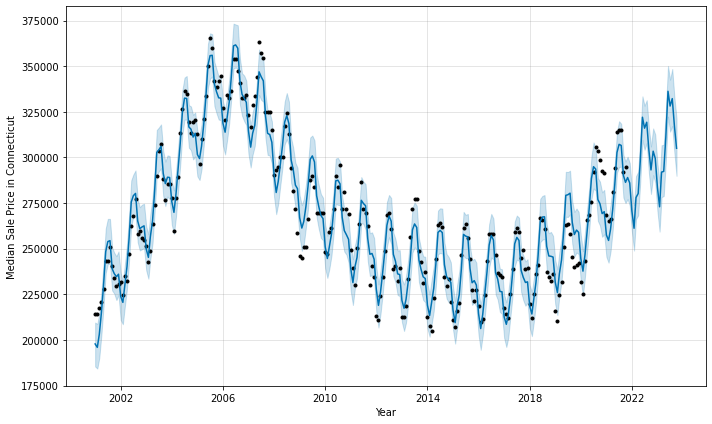

In [81]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

## Plotting components of forecast data

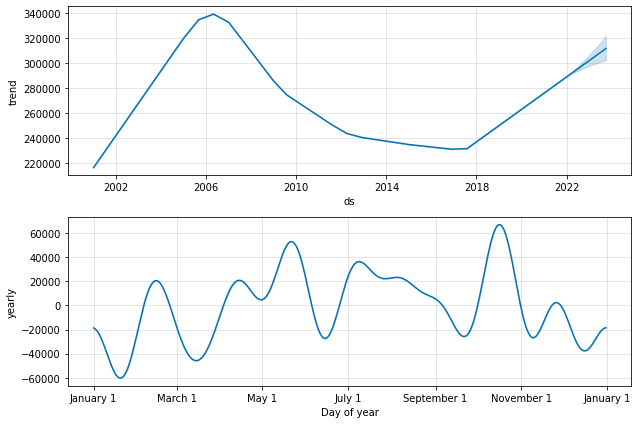

In [82]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [83]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [84]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [85]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics

In [86]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,1.971078e+08,14039.509038,11148.568764,0.040894,0.034867,0.041334,0.454545
1,40 days,1.755587e+08,13249.856663,10452.533025,0.038502,0.034372,0.038804,0.477273
2,42 days,1.641188e+08,12810.885564,10052.130823,0.037171,0.033182,0.037403,0.500000
3,44 days,1.749317e+08,13226.176142,10423.594642,0.038875,0.033182,0.038946,0.477273
4,45 days,1.911933e+08,13827.265542,10966.590257,0.040641,0.034867,0.040657,0.477273


In [87]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.95910631302202%
Horizon: 40 days 00:00:00, Accuracy: 99.96149841306581%
Horizon: 42 days 00:00:00, Accuracy: 99.96282906613413%
Horizon: 44 days 00:00:00, Accuracy: 99.96112520630645%
Horizon: 45 days 00:00:00, Accuracy: 99.95935884162738%
Horizon: 46 days 00:00:00, Accuracy: 99.95976002148%
Horizon: 47 days 00:00:00, Accuracy: 99.95986239018293%
Horizon: 49 days 00:00:00, Accuracy: 99.95940233063881%
Horizon: 50 days 00:00:00, Accuracy: 99.96163650246133%
Horizon: 51 days 00:00:00, Accuracy: 99.96060386615282%
Horizon: 52 days 00:00:00, Accuracy: 99.96096729396868%
Horizon: 54 days 00:00:00, Accuracy: 99.96072707420956%
Horizon: 55 days 00:00:00, Accuracy: 99.96031472265796%
Horizon: 56 days 00:00:00, Accuracy: 99.9599080922327%
Horizon: 58 days 00:00:00, Accuracy: 99.96026460606322%
Horizon: 60 days 00:00:00, Accuracy: 99.96141073010935%
Horizon: 61 days 00:00:00, Accuracy: 99.95909715422385%
Horizon: 62 days 00:00:00, Accuracy: 99.958708715161

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

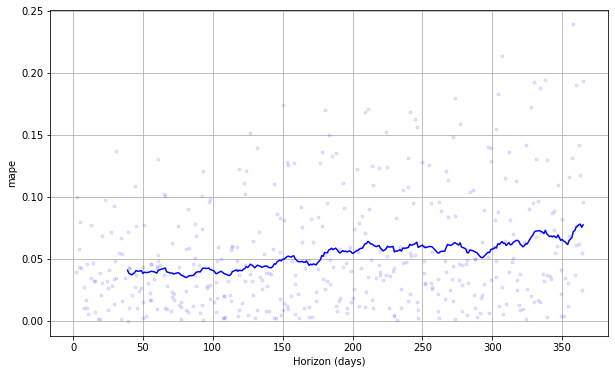

In [88]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [89]:
import pickle

In [90]:
with open(county_name+'_prophet_model_for_median_sale_price.pkl','wb') as file:
    pickle.dump(m,file)